In [1]:
import PIL
import fitz
import pandas as pd 
from PIL import Image
import io
import re

In [3]:
doc = fitz.open('Data/Pathfinder_Bestiary_1.pdf') # abrindo o PDF


obs:
    
problema - nome do monstro em 1 pagina e image na prox pagina. Colocar algo que caso encontre apenas o nome e não a imagem, pegar a imagem da proxima pagina. 
    
    
problema - pagina que não tem nada como por exemplo 196. colocar algo que caso as 2 funcoes não funcionem ignorar o resultado. 

# Tratamenteo para pegar imagem

In [21]:
def req_image (argumento):
    '''recebe um int(numero da pagina), substitue este valor e extrai a imagem da pg em questão'''
    page_image = doc[argumento] # salvando a pagina [numero da pagina] como page
    
    list_image = page_image.get_images() #  lista de imagens da pagina escolhida

    for item in list_image: 
            if item[3] >100 and item[3] != 1603:   # este for esta aqui para escolher imagem pelo tamanho, neste caso com o 4 parametro acima de 100 e diferente de 1603, pois este valor e o tamanho da imagem de fundo da pagina
                img_creature = item
            else:
                ''
    imagem_isolada = doc.extract_image(img_creature[0])['image']
    
    return imagem_isolada
    

In [15]:
Imagem_pronta = PIL.Image.open(io.BytesIO(req_image(11)))  # printando a imagem com a funcao
Imagem_pronta

ValueError: Could not save to PNG for display

<PIL.Jpeg2KImagePlugin.Jpeg2KImageFile image mode=L size=51x1042 at 0x174272FABB0>

In [64]:
page_image = doc[8] # salvando a pagina [numero da pagina] como page
    
list_image = page_image.get_images() #  lista de imagens da pagina escolhida

for item in list_image: 
    if item[3] >100 and item[2] != 1226:  
        img_creature = item
    else:
        ''
imagem_isolada = doc.extract_image(img_creature[0])['image']


list_image


[(1421, 0, 1226, 1603, 8, 'ICCBased', '', 'Im0', 'DCTDecode'),
 (1443, 1456, 744, 757, 8, 'ICCBased', '', 'Im1', 'DCTDecode'),
 (1274, 7087, 216, 60, 8, 'ICCBased', '', 'Im2', 'DCTDecode'),
 (1442, 7102, 52, 51, 8, 'ICCBased', '', 'Im3', 'DCTDecode'),
 (1441, 7101, 52, 51, 8, 'ICCBased', '', 'Im4', 'DCTDecode'),
 (1419, 7097, 52, 51, 8, 'ICCBased', '', 'Im5', 'DCTDecode')]

In [69]:
Imagem_pronta = PIL.Image.open(io.BytesIO(list_image[0]))  # printando a imagem com a funcao

#  Imagem_pronta = PIL.Image.open(io.BytesIO(req_image(8)))

#  im = Image.open('list_image[0]')
#  
#  
#  im.show(list_image[0])


TypeError: a bytes-like object is required, not 'tuple'

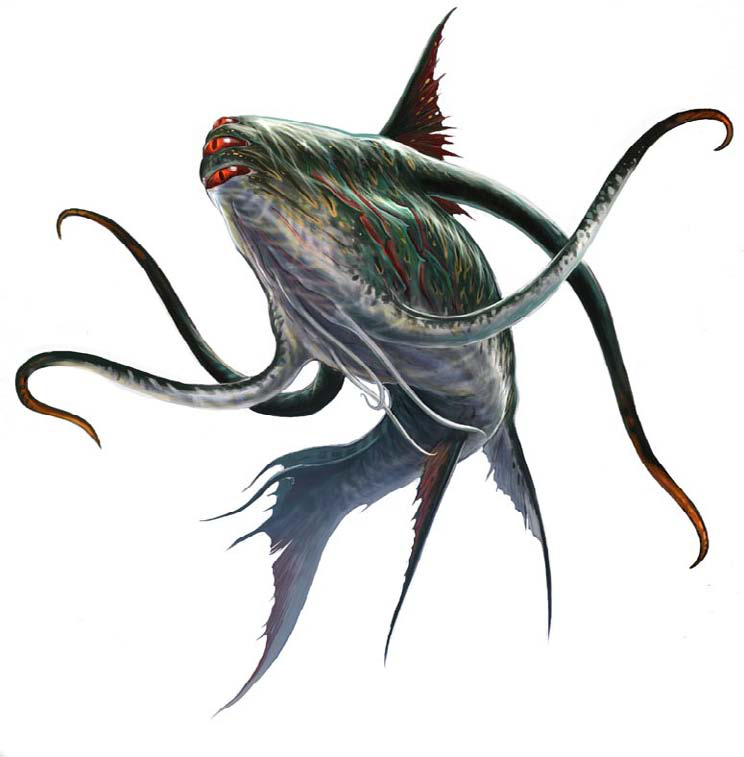

In [68]:
Imagem_pronta

# Tratamento para pegar nome do monstro

In [5]:
def req_text(argument):
    
    '''Função recebe um int(numero da pagina) e retorna o nome limpo que está com a segunda coordenada de 135.28799438476562  '''
    
    page_text = doc[argument]  # salvando a pagina [numero da pagina] como page_text 

    words = page_text.get_text("words")  # extraindo todas as palavras da pagina 1
    
    lista_nomes = []

    for i in words:   # for para pegar o nomes do monstro na pagina. So funciona se o nome estiver com o segundo valor de 135.28799438476562
        for image in i:
            if image == 135.28799438476562:
                x = i[4]
                lista_nomes.append(x+' ')
            else:
                ''
                
    lista_nomes_sujos =''.join(lista_nomes)                

    lista_nomes_limpa = re.findall('.*?\d+',lista_nomes_sujos )

    return lista_nomes_limpa
    
    

In [17]:
# req_text(11)

# funcao para salvar a imagem cm o nome certo

In [6]:

def img_names (pg):
    '''Funcao recebe o numero da pagina, pega o nome do monstro com a funcao req_text, pega a imagem da pagina com a funcao req_image e salva a imagem com o nome do monstro  '''
    Imagem_pronta = PIL.Image.open(io.BytesIO(req_image(pg))) # abrindo a imagem gerada pela funcao req_image
    name = req_text (pg) # funcao para pegar o nome do monstro
    name = str(req_text(pg)[0])  # tranfomando o nome em str

    Imagem_pronta.save('C:/Users/Escanor/Desktop/Iron HAck/Projetos/Projeto obrigatorio/Pathfinder/img_name/'+name+'.jpg')
    
    
    
    return 'imagem salva' 



In [12]:
img_names(11)

OSError: decoder jpeg2k not available